# Yandex 100 - Predictions using ML algorithems



### Intro
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data

### Goal Statement
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

# Table of Contents 




## **[Download the data ](#1)**
 
 
## **[Carry out Exploratory Data Analysis (EDA)](#2)**     

### **[Data Preprocessing](#21)**   

### **[Features Analysis](#22)** 
 
 [binary / non binary features analysis](#221)
 
### **[Raw Data Analysis](#23)** 
     
 [Non Binary Features - Histograms & Statistics](#231)
 
 [Non Binary Features - Unique Values counts](#232)

 [Non Binary Features - Statistical Data](#233) 
 
 [Binary Features - Values Count](#234)

 [Binary Features - Statistical Data](#235) 
 
### **[Churn vs. Stay groups analysis](#24)**

 [mean feature values in two groups](#241)

 [Plot bar histograms and feature distributions for those who left (churn) and those who stayed.](#242)
 
 [Feautres Histograms for Binary Data](#243)
 
### **[Correlation Matrix](#25)**

### **[EDA Conclusions](#26)**


## **[Step 3. Build a model to predict user churn](#3)**

### **[Divide the data into train and validation sets ](#31)**

### **[Train the model on the train set](#32)**

 [Method 1: Logistic regression](#321)
     
 [Method 2: random forest](#322)


### **[Evaluate Metrics](#33)**

### **[Evaluate accuracy, precision, and recall for both models using the validation data ](#34)**


 [How much money was spent? Overall/per source/over time? ](#341)
     
 [How much did customer acquisition from each of the sources cost? (CAC)](#342)
 
 [How worthwhile where the investments? (ROI)](#343)
 
 
## **[Step 4. Create user clusters](#4)**     

#### **[Look at the mean feature values for clusters ](#41)**

#### **[Plot distributions of features for the clusters](#42)**

#### **[Calculate the churn rate for each cluster ](#43)**


## **[Step 5. Overall Conclusion](#5)**   


<a class="anchor" id="1"></a>
# Step 1. Download the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

from plotly.graph_objects import Layout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")    

In [4]:
# upload the data
try: 
    df = pd.read_csv('gym_churn_us.csv')
except:
    df = pd.read_csv('/datasets/gym_churn_us.csv')

<a class="anchor" id="2"></a>
# Step 2. Carry out Exploratory Data Analysis (EDA)

In [5]:
# first look at the data
display(df.head(10))
display(df.info())
display(df.describe())

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [6]:
# the df contains 4000 rows
# all columns are in int / float format


# age - all customers are between the age of 18-41, with average and median age of 29. 
# lifetime - the median lifetime is, the average lifetime is 3.72
# churen column represent customers who stayed - 1 and customers who left - 0 

<a class="anchor" id="21"></a>
## Data Preproecessing

In [7]:
# lowercase columns
df.columns= df.columns.str.lower()

# missing values 
display('null values:', df.isnull().sum())

# duplicated rows
display('duplicated rows:', df[df.duplicated() == True].count())

# conversions
# Different conversions such as normalization and standardization will be considered at the next stages.

'null values:'

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

'duplicated rows:'

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

#### Conclusions:
- no missing values nor duplicated rows were detected in the raw data

<a class="anchor" id="22"></a>
## Features Analysis

<a class="anchor" id="221"></a>
### Binary / Non Binary features analysis

#### Seperate data into binary/non binary features

In [8]:
# detect binary and non-binary columns

binary = []
non_binary = []

for i in df.columns:
#    print(str(i) + ' unique values: {}'.format(df[i].nunique()))
    if df[i].nunique() == 2:
        binary.append(i)
    else:
        non_binary.append(i)

In [9]:
# display the two types of features sepertaly 
print('binary features:\n', binary)
print('\nnon binary features:\n', non_binary)

# currect binary
false_binary = ['gender']
binary =  list(set(binary) - set(false_binary))

binary features:
 ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

non binary features:
 ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


#### Conclusions:
The features in the data are evenly divided: 7 columns of binary, 7 columns of non-binary

<a class="anchor" id="23"></a>
##  Raw Data Analysis

<a class="anchor" id="231"></a>
### Non Binary Features - Histograms & Statistics

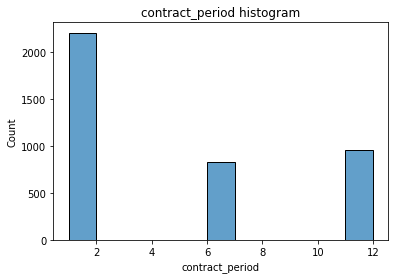

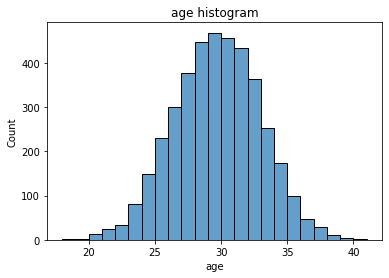

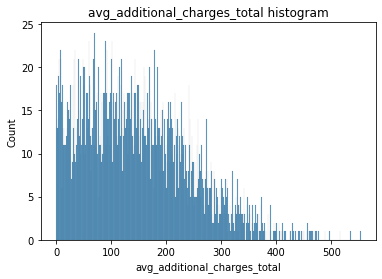

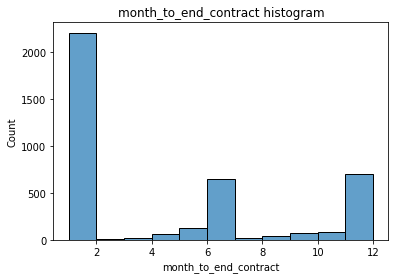

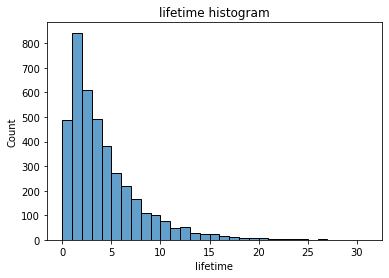

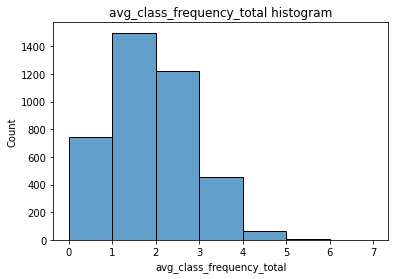

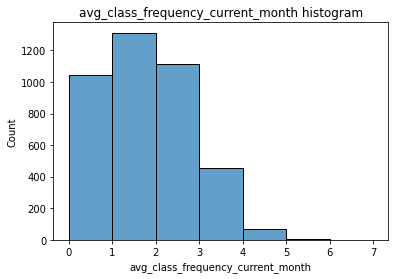

In [10]:
# scan histograms for distribution of non_binary data 
for i in non_binary:
    sns.histplot(data=df, x=i, binwidth=1, alpha = 0.7)
    plt.title(str(i) + ' histogram')
    plt.show()

#### Preliminary Conclusions:

- Age columns is normally distributed with a mean of 29.
- Columns with skewed distribution: most notebly age_additional_charges_total, lifetime (both skewed left)



- contract period: 
    - The majoriy of the customers signes a 1 month contract only, this could be a cause of concern which can result in very high churn rate. 
    - Also, we see suspiciously that none of the customers signed to a 3 month contract. This could be either a problem with the input data during regestration, or due to the fact that most customer prefer either a very short,medium or long contract period. Still, in data of 4000 rows, it's unlikely.


- avg_additional_charges_total: we see a very dense histogram between 0 - 300 dollars. Data from describe() shows a mean and median of 146 and 136 dollars, respectevly. This is a good sign for additional revenue. 


- month to end contract: As expected, similar pattern to contract_period, high risk for Multicollinearity


- Lifetime column: As expected due to contract_period columns, most customers in this data are pretty fresh, 6 months or less since registration


- avg_class_frequency_current_month; average_class_frequency_current_total columns: 
    - we see that both columns are highly correlated, this could effect the future ML model and make overfitting (Multicollinearity). The columns show that the majoriy of the customers visit the gym between 1-3 times a week.



  - <b> Multicollinearity </b>: a strong correlation among several features.
  - Features with high correlation: 
      - 1. avg_class_frequency_current_month & average_class_frequency_current_total
      - 2. month to end contract & contract_period. 

<a class="anchor" id="232"></a>
### Non Binary Features - Unique Values counts

In [11]:
for i in non_binary:
    print(str(i) + ' unique values: {}'.format(df[i].nunique()))

contract_period unique values: 3
age unique values: 23
avg_additional_charges_total unique values: 4000
month_to_end_contract unique values: 12
lifetime unique values: 29
avg_class_frequency_total unique values: 3913
avg_class_frequency_current_month unique values: 3820


#### Conclusions: 
- some of the featrues are characterized with high values range and some with low range. This should be noted for features weight analysis

<a class="anchor" id="233"></a>
### Non Binary Features - Statistical Data

In [12]:
# Statistical data: binary:
df_non_binary = df[np.intersect1d(df.columns, non_binary)]
df_non_binary.describe()

age  avg_additional_charges_total  \
count  4000.000000                   4000.000000   
mean     29.184250                    146.943728   
std       3.258367                     96.355602   
min      18.000000                      0.148205   
25%      27.000000                     68.868830   
50%      29.000000                    136.220159   
75%      31.000000                    210.949625   
max      41.000000                    552.590740   

       avg_class_frequency_current_month  avg_class_frequency_total  \
count                        4000.000000                4000.000000   
mean                            1.767052                   1.879020   
std                             1.052906                   0.972245   
min                             0.000000                   0.000000   
25%                             0.963003                   1.180875   
50%                             1.719574                   1.832768   
75%                             2.510336                   2.536078   
max                             6.146783                   6.023668   

       contract_period     lifetime  month_to_end_contract  
count      4000.000000  4000.000000            4000.000000  
mean          4.681250     3.724750               4.322750  
std           4.549706     3.749267               4.191297  
min           1.000000     0.000000               1.000000  
25%           1.000000     1.000000               1.000000  
50%           1.000000     3.000000               1.000000  
75%           6.000000     5.000000               6.000000  
max          12.000000    31.000000              12.000000

<a class="anchor" id="234"></a>
### Binary Features - Values Count

In [13]:
# scan histograms for distribution of binary data 

for i in binary:
    display(df[i].value_counts())
    display('{}, "1" value accounts for {:.2%}'.format(i, (len(df[df[i] == 1]) / len(df))))

1    3381
0     619
Name: near_location, dtype: int64

'near_location, "1" value accounts for 84.52%'

0    2053
1    1947
Name: partner, dtype: int64

'partner, "1" value accounts for 48.68%'

0    2351
1    1649
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 41.23%'

0    2766
1    1234
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 30.85%'

1    3614
0     386
Name: phone, dtype: int64

'phone, "1" value accounts for 90.35%'

0    2939
1    1061
Name: churn, dtype: int64

'churn, "1" value accounts for 26.52%'

<a class="anchor" id="235"></a>
### Binary Features - Statistical Data

- binary columns (0 or 1):
- binary features can be address as categorical calssification - yes or no calssifiedv

In [14]:
# Statistical data: binary:
df_binary = df[np.intersect1d(df.columns, binary)]
df_binary.describe()

churn  group_visits  near_location      partner        phone  \
count  4000.000000   4000.000000    4000.000000  4000.000000  4000.000000   
mean      0.265250      0.412250       0.845250     0.486750     0.903500   
std       0.441521      0.492301       0.361711     0.499887     0.295313   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%       0.000000      0.000000       1.000000     0.000000     1.000000   
50%       0.000000      0.000000       1.000000     0.000000     1.000000   
75%       1.000000      1.000000       1.000000     1.000000     1.000000   
max       1.000000      1.000000       1.000000     1.000000     1.000000   

       promo_friends  
count    4000.000000  
mean        0.308500  
std         0.461932  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### Conclusions:

- Binary features with generally equal distribution (40-60 to 50-50): gender, Partner, Group_visits 
- Bineary features with unequal distrubition: Near_Location, Promo_friends, Phone, Churn
- gender, genger mean of 0.51 - equal men/women customer. 
- Churn mean is 0.26, meaning most of the customers left the membership.
- near location mean is 0.86, meaning most of the customers live nearby.
- most customers agreed to give their phone number
- promo friends - 0.3, meaning most of the customers signed with no discount
- 50% of the customers are by partner. 



In [15]:
# question - is there a negetive correlation between nearby and churn rate?
# question - is phone really that valuable data? hypothesis- could be that customer who didn't are more likely to leave the gym (introverted)


<a class="anchor" id="24"></a>
## Churn vs. Stay groups analysis

<a class="anchor" id="241"></a>
### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

#### check mean before spiltting into groups using the groupby method 

In [16]:
# method 1 - check mean for both binary and non-binary data
df_churn = df.groupby('churn')[df.columns.drop('churn')].mean().reset_index()
df_churn

churn    gender  near_location   partner  promo_friends     phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   
1         1.728558      0.268615  26.989632                    115.082899   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               5.283089  4.711807                   2.024876   
1               1.662582  0.990575                   1.474995   

   avg_class_frequency_current_month  
0                           2.027882  
1                           1.044546

#### Build table for stay / churn with mean values for both non_binary and binary features

In [17]:
# split the data into customers who left (churn = 1) and stayed (churn = 0)
df_stay = df[df['churn'] == 0]
df_left = df[df['churn'] == 1]

In [18]:
display(df_stay.shape)
display(df_left.shape)

(2939, 14)

(1061, 14)

#### non_binary data:

In [19]:
# create mean table for non_binary features

# stay users: calculate mean for stay users
df_stay_non_binary_mean = df_stay[non_binary].mean(axis = 0).reset_index()
df_stay_non_binary_mean = df_stay_non_binary_mean.rename(columns = {0: 'mean'})

# churn users: calculate mean for stay users
df_left_non_binary_mean = df_left[non_binary].mean(axis = 0).reset_index()
df_left_non_binary_mean = df_left_non_binary_mean.rename(columns = {0: 'mean'})

# merge the two tables
df_stay_left_non_binary_mean = pd.merge(df_stay_non_binary_mean, df_left_non_binary_mean, on = 'index', left_index=True, right_index=True, suffixes = ('_stay','_churn'))
df_stay_left_non_binary_mean

index   mean_stay  mean_churn
0                    contract_period    5.747193    1.728558
1                                age   29.976523   26.989632
2       avg_additional_charges_total  158.445715  115.082899
3              month_to_end_contract    5.283089    1.662582
4                           lifetime    4.711807    0.990575
5          avg_class_frequency_total    2.024876    1.474995
6  avg_class_frequency_current_month    2.027882    1.044546

#### Conclusions- Groups Non Binary Features:
- Loyal (stay) group is characterized by much longer membership period progrems. Customers who makes 1 month membership are much more likely to leave.
- Loyal customers spend 35% more on additional charges 
- Loyal customers participate at 2 classes a week on average, compare to only 1 class in the churn group.

#### binary data:

In [20]:
# create mean table for binary features

# stay users: calculate mean for stay users
df_stay_binary_mean = df_stay[binary].mean(axis = 0).reset_index()
df_stay_binary_mean = df_stay_binary_mean.rename(columns = {0: 'mean'})

# churn users: calculate mean for churn users
df_left_binary_mean = df_left[binary].mean(axis = 0).reset_index()
df_left_binary_mean = df_left_binary_mean.rename(columns = {0: 'mean'})

# merge the two tables
df_stay_left_binary_mean = pd.merge(df_stay_binary_mean, df_left_binary_mean, on = 'index', left_index=True, right_index=True, suffixes = ('_stay','_churn'))
df_stay_left_binary_mean

index  mean_stay  mean_churn
0  near_location   0.873086    0.768143
1        partner   0.534195    0.355325
2   group_visits   0.464103    0.268615
3  promo_friends   0.353522    0.183789
4          phone   0.903709    0.902922
5          churn   0.000000    1.000000

#### Conclusions- Groups Binary Features:
- The stay group is consisted of more customers who live nearby, but not in a dramatic different (less then 10%)
- Customers who sign their membership through promo_friend or a a company, are much more likely to stay in the gym.


<a class="anchor" id="242"></a>
### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

#### Feautres Histograms for Non Binary Data

In [21]:
non_binary

['contract_period',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

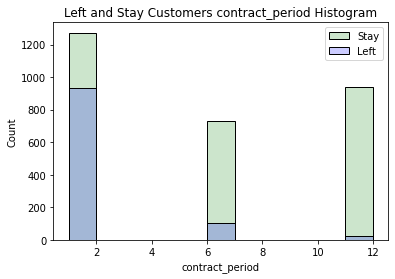

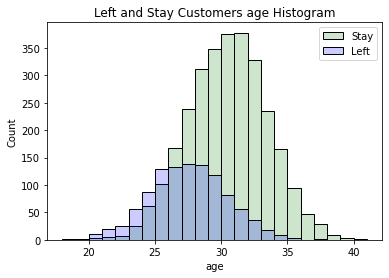

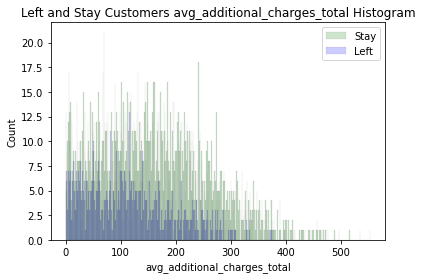

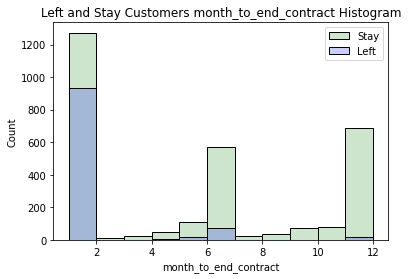

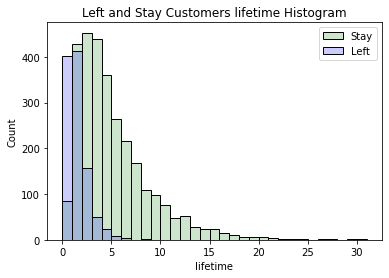

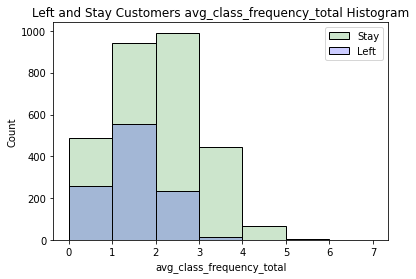

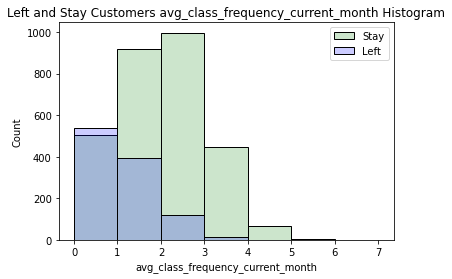

In [22]:
# non binary features
for i in non_binary:

    # plot histograms for those who stayed
    sns.histplot(data=df_stay, x=i, binwidth=1, alpha = 0.2, color = 'green', label='Stay')

    # add histograms for those who left
    sns.histplot(data=df_left, x=i, binwidth=1, alpha = 0.2, color = 'blue', label='Left')
    plt.title('Left and Stay Customers ' + str(i) + ' Histogram')
    plt.legend()
    plt.show()      
  

In [23]:
binary = ['group_visits', 'partner', 'phone', 'near_location', 'promo_friends']

<a class="anchor" id="243"></a>
### Feautres Histograms for Binary Data

#### Method 1: compare each feature between the two groups

In [24]:
# binary features

for i in binary:
        
        # plot histogram for those who stayed
        df_stay_count = df_stay[i].value_counts()
        #sns.barplot(data=df_stay_count, x = 'index', y = i, alpha = 0.7)
        #plt.title('Stay_Users ' + str(i) + ' barplot')
        #plt.show()
        df_left_count = df_left[i].value_counts()
        new = pd.merge(df_stay_count, df_left_count, left_index=True, right_index=True, suffixes = ('_ Stay','_ Left')).T
        new = new.rename(columns = {1:'1',0:'0'})

        fig = go.Figure()
        fig.add_trace(go.Bar(x=new.index, y=new["1"], name="1"))
        fig.add_trace(go.Bar(x=new.index, y=new["0"], name="0"))
        fig.update_layout(autosize=False,width=400,height=500, margin=dict(l=10, r=10, b=50, t=100, pad=8))
        
        fig.update_layout(
            title= {
                    'text': "{} Distribution".format(i), 
                    'y':0.85, 
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'
                   },
            xaxis_title = "Category",
            yaxis_title = "Count",
            
            font= dict(
                      size=10,
                      color="black"
    ))
        fig.show()

##### Method 2 - compare by group

In [25]:
# stay group:
# build a df with the count users for each binary features using the sum() (counts all users with '1' value)
df_stay_count = df_stay[binary[:-1]].sum(axis = 0).reset_index()
# rename the column to 'count_1'
df_stay_count = df_stay_count.rename(columns = {0: 'count_1'})
# calculate the difference between the df length (no. of total users) and the count_1, get the count of '0' values
df_stay_count['count_0'] = len(df_stay) - df_stay_count['count_1'] 

# plot histogram for stay users (churn = 0)
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure()
fig.add_trace(go.Bar(x=df_stay_count['index'], y=df_stay_count['count_1'], name="1"))
fig.add_trace(go.Bar(x=df_stay_count['index'], y=df_stay_count['count_0'], name="0"))
fig.update_layout(autosize=False,width=900,height=400, margin=dict(l=10, r=10, b=20, t=50, pad=4))
fig.update_layout(
    title="Stay Customers (churn = 0) - Binary Features Distributions",
    xaxis_title="Category",
    yaxis_title="Number of Customers",
    font=dict(size=12, color="black"))
fig.show()


# churn group:
# build a df with the count users for each binary features using the sum() (counts all users with '1' value)
df_left_count = df_left[binary[:-1]].sum(axis = 0).reset_index()
# rename the column to 'count_1'
df_left_count = df_left_count.rename(columns = {0: 'count_1'})
# calculate the difference between the df length (no. of total users) and the count_1, get the count of '0' values
df_left_count['count_0'] = len(df_left) - df_left_count['count_1'] 


# plot histogram for left users (churn = 1)
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure()
fig.add_trace(go.Bar(x=df_left_count['index'], y=df_left_count['count_1'], name="1"))
fig.add_trace(go.Bar(x=df_left_count['index'], y=df_left_count['count_0'], name="0"))
fig.update_layout(autosize=False,width=900,height=350,margin=dict(l=10, r=10, b=20, t=50, pad=4))
fig.update_layout(
    title="Left Customers (churn = 1) - Binary Features Distributions",
    xaxis_title="Category",
    yaxis_title="Number of Customers",
    font=dict(size=12, color="black"))
fig.show()

#### Conclusions: comparing the two shows different patterns

- Size - Stay group contain about 3000 customers, which is 3 times more customers then Left (churn) group (~1000).


- Similar distributions:
    - gender
    - phone


- Different distributions:
   - near location: In the stay group, higher percent of customers are living nearby compare to those who left.
   - partner - Noticebly, In the left group: the number of customers that no sign up via partner is double then those who do. In the stay group they are distributed evenly.
   - Promo_friend: signing up using a friend coupon highly decrease the likelyhood of leaving the gym.
   - group sessions: customers who participate in group sessions are more likely to keep their membership. This could be a good strategy to motivate customers for group activies.

<a class="anchor" id="25"></a>
## Correlation matrixes

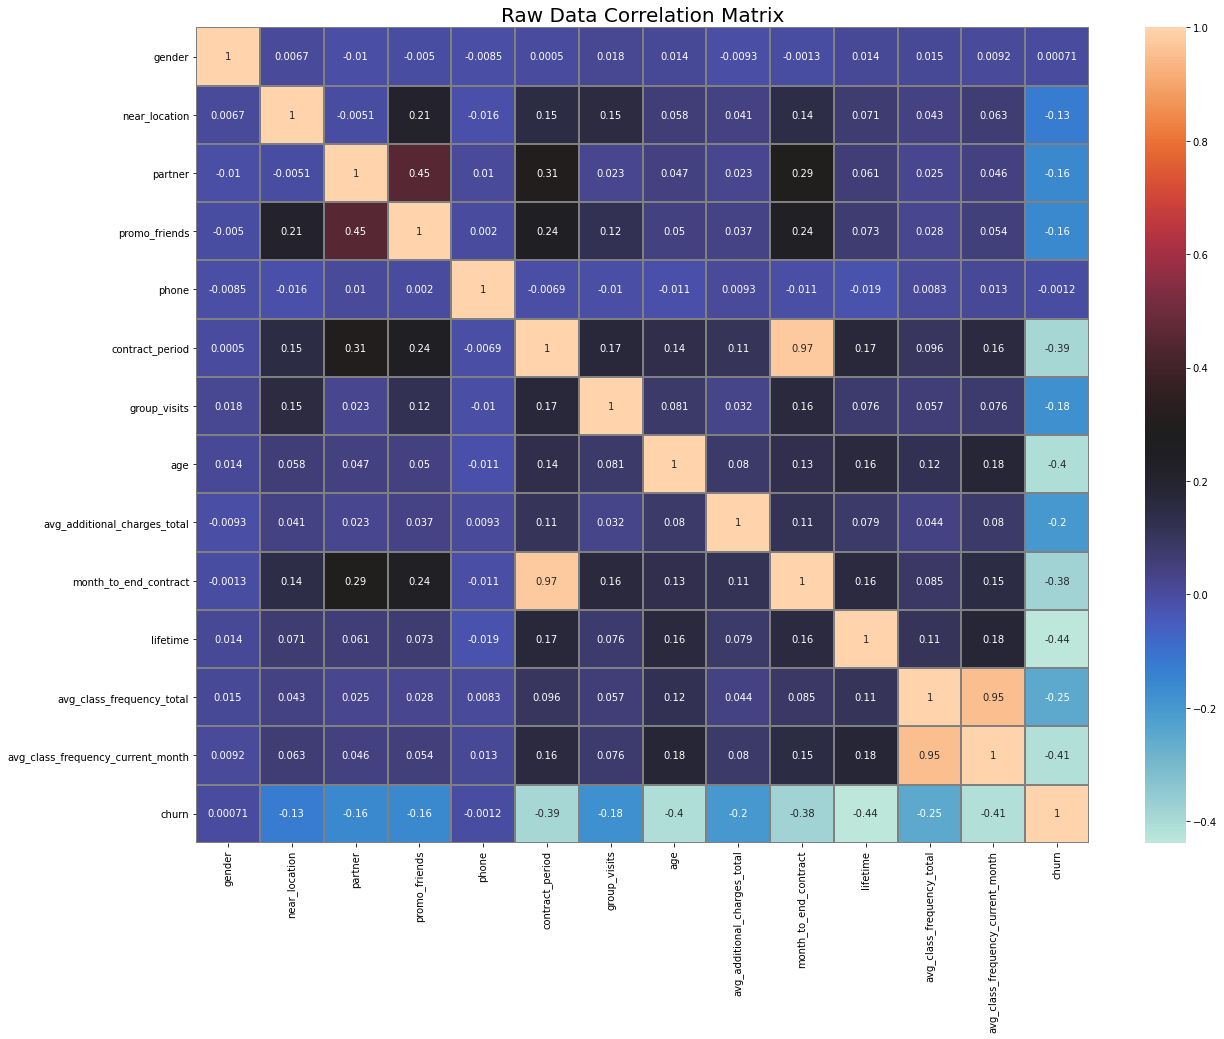

In [26]:
# correlation matrix for the raw data
cm_raw = df.corr()
plt.figure(figsize = (20,15))
plt.title('Raw Data Correlation Matrix', fontsize=20)
sns.heatmap(cm_raw, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

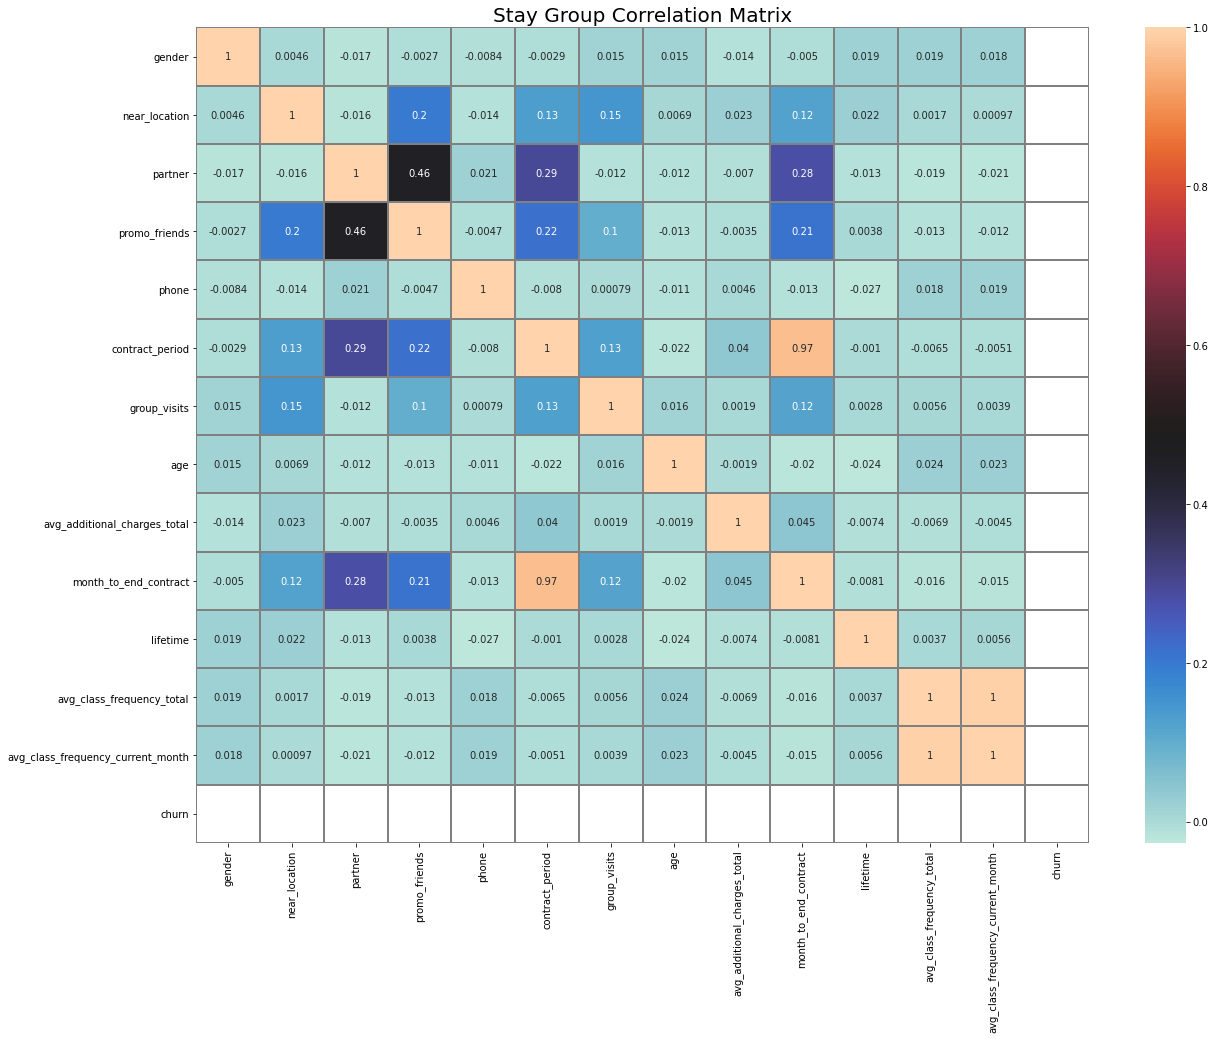

In [27]:
# correlation matrix for stay group only
cm_stay = df_stay.corr()
plt.figure(figsize = (20,15))
plt.title('Stay Group Correlation Matrix', fontsize=20)
sns.heatmap(cm_stay, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

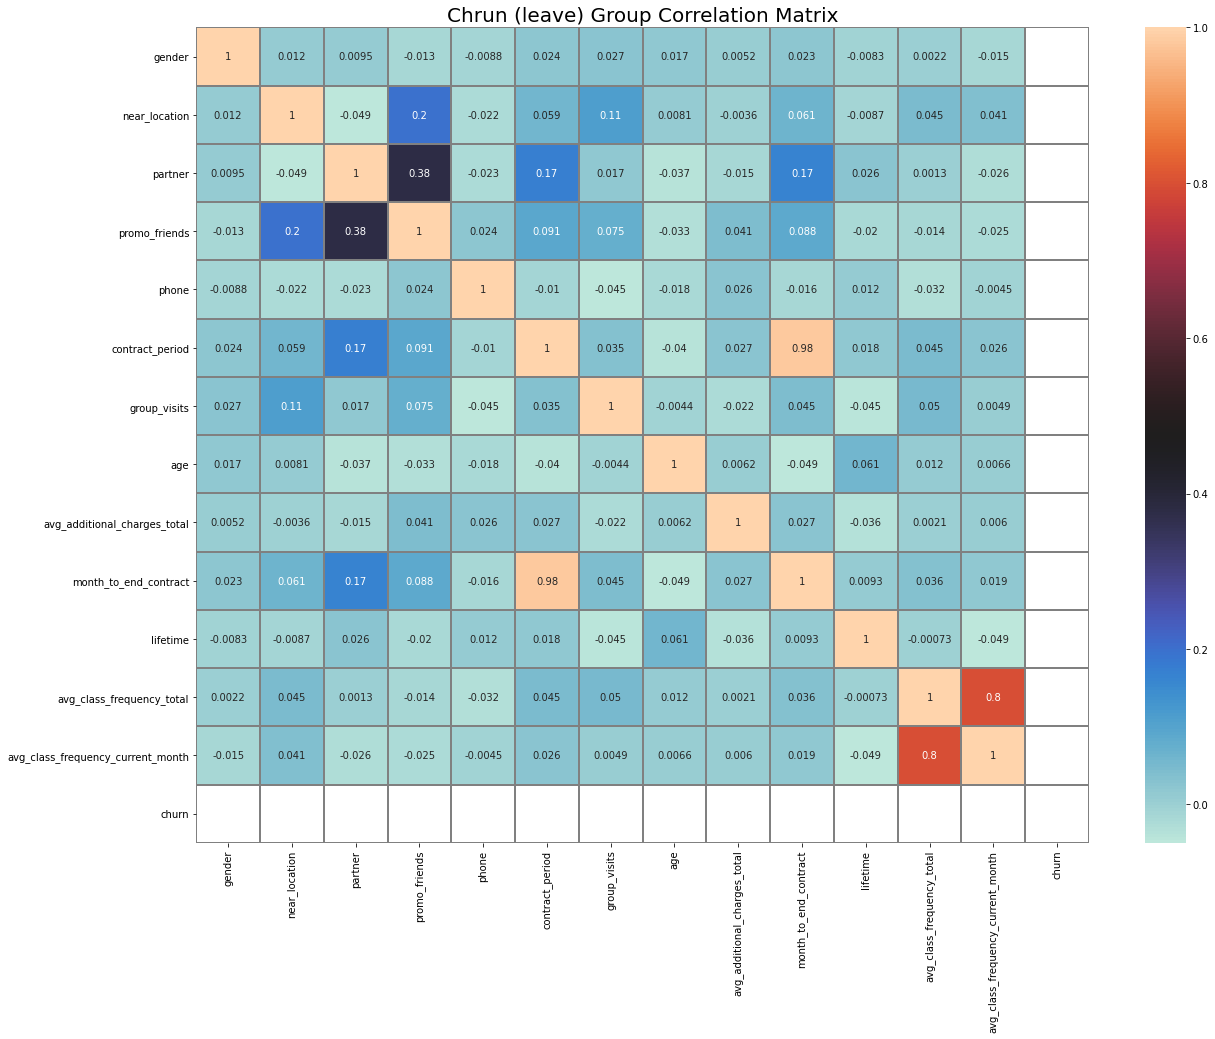

In [28]:
# correlation matrix for churn group only
cm_left = df_left.corr()
plt.figure(figsize = (20,15))
plt.title('Chrun (leave) Group Correlation Matrix', fontsize=20)
sns.heatmap(cm_left, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

- Reminder: Mutual correlation is undesirable with linear models, so pay special attention to this if you choose such models.

##### Conclusions: 
- highly correlated features ( > 0.8) - risk for multicollinearity:
    - contract_period & month_to_end_contract
    - average_class_frequency_current_month & avg_class_frequency_total

<a class="anchor" id="26"></a>
## EDA overall conclusions:

<b> Data Preprocessing: </b> 
  - no missing values in the data.
  - no outliars were observed in histograms nor in the tables
  - no douplicted rows.
    
<b> For ML models: </b>
  - There are numrous features which can cause multicollinearity.


<b> Difference between groups: </b>
  - The data is composed of more customers who stays in the gym then those who left. However, it seems that both have suffiecent users in order to make the analysis
  - Gender show normal distribution as is exepcted, good sign for the quality of the data.
  - In first glance, we see some features show difference between two groups. Some of them can be classified as socially related: promo_friend, group_visit and partner. We can suggest a positive correlation between social activaties and the stay in the gym.
  - near location does seems to play a role in keeping users membership. However, overall the differences is not that dramatic. We can increase the amount of people who choose to stay by focusing on other features which we can have control on.

<a class="anchor" id="3"></a>
# Step 3. Build a model to predict user churn

<a class="anchor" id="31"></a>
## Divide the data into train and validation sets 

<font color='gray'>
    
### Student comment after V2: 
edited the X by dropping the multicolinear columns, didn't change much which seems reasonable for classified models. 

   </font>

In [29]:
# divide the data into features (the X matrix) and a target variable (y)
X = df.drop(['churn', 'avg_class_frequency_current_month','month_to_end_contract'], axis = 1)
y = df['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<div class="alert alert-warning">
<h3>Reviewer's comment</h3>

We can add stratify=y inside train_test_split function, where y is our target variable. As a result, the dataset will be devided into two clusters. The first one will contain all the observations of class 0, while the second one – all the observations of class 1. Then, 20% of observations from each cluster will be combined into test set:
    
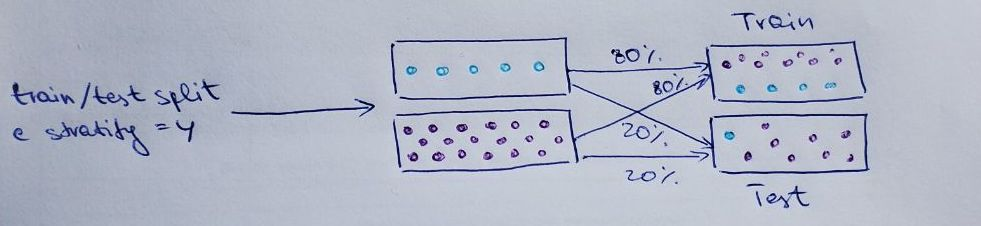
    
This approach helps to split the data into train and test sets in a way that preserves the proportions of observations in each class as observed in the original dataset. It is important as our classes are imbalanced.

<a class="anchor" id="32"></a>
## Train the model on the train set with two methods:
        - logistic regression
        - random forest

<a class="anchor" id="321"></a>
### Method 1: Logistic regression

<b> Background </b>
- Logistic regression: Used in order to solve binary classification tasks. The model is used for supervised ML classification.
- Logistic regression model is using a logistic function (the sigmoid curve) which includes a linear regression (z variable).
- The model actually tries to find the probablity of the target variable, using the sigmoid curve and a threshold.


<b>For This model: </b>
- Statement of problem - what is the probability that a customer will cancel his membership
- Target variable - churn. 

In [30]:
# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [31]:
# create a dictionery to count predicted values
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

display(count_elements(predictions))

{0: 594, 1: 206}

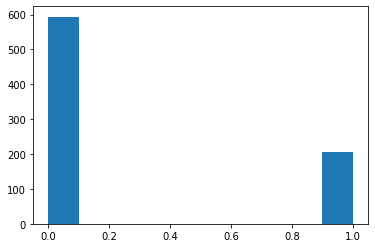

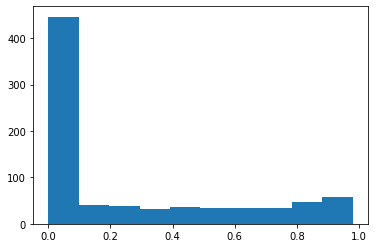

In [32]:
plt.hist(predictions)
plt.show()
plt.hist(probabilities)
plt.show()

<a class="anchor" id="322"></a>
### Method 2: random forest

<b> Background </b>
- The model is a type of ensemble model, a consolidated algorithm consists of a plethora of trees.
- Random forestClassifier: Used in order to solve binary classification tasks. 
- It generates many mutually independent trees in slightly different ways (taking different subsets or features) and reaches a final decision based on their answers.
- Such algorithms are sometimes called black boxes, since it's hard to tell how a particular feature impacted the prediction for an object.

<b>For This model: </b>
- Statement of problem - what is the probability that a customer will cancel his membership.
- Target variable - churn. 

In [33]:
# random forest

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


In [34]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 4, random_state = 0)  
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here

In [35]:
display(count_elements(rf_predictions))

{0: 621, 1: 179}

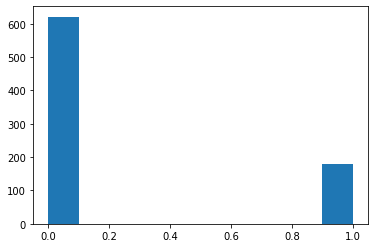

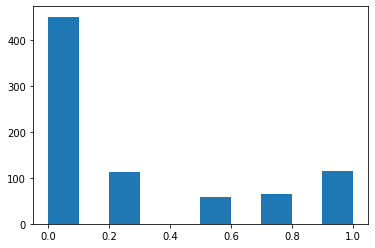

In [36]:
plt.hist(rf_predictions)
plt.show()
plt.hist(rf_probabilities)
plt.show()

#### Conclusions:
- According to the logistic regression model, 76% of the users in the validation set are likely to stay in the gym.
- According to the random forest model, 78% of the users in the validation set are likely to stay in the gym.

<a class="anchor" id="33"></a>
## Evaluate Metrics

<a class="anchor" id="331"></a>
### Evaluate accuracy, precision, and recall for both models using the validation data. 

In [37]:
# function that prints the metrics results
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [38]:
# apply the function on logistic regression model
print_all_metrics(y_test, predictions, probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.90
	Precision: 0.83
	Recall: 0.80


In [39]:
# apply the function on random forest model
print_all_metrics(y_test, rf_predictions, rf_probabilities , title='Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.88
	Precision: 0.83
	Recall: 0.70


#### Use them to compare the models. Which model gave better results?

- The logistic regression resulted with a slightly better metrics scores. The only significant factor was the recall.
- THis means that using the logistic regression, we are less likely to predict false negitive results.

<a class="anchor" id="4"></a>
# Step 4. Create user clusters

In [40]:
# Set aside the column with data on churn and identify object (user) clusters:
df_cluster = df.drop(['churn'], axis = 1)

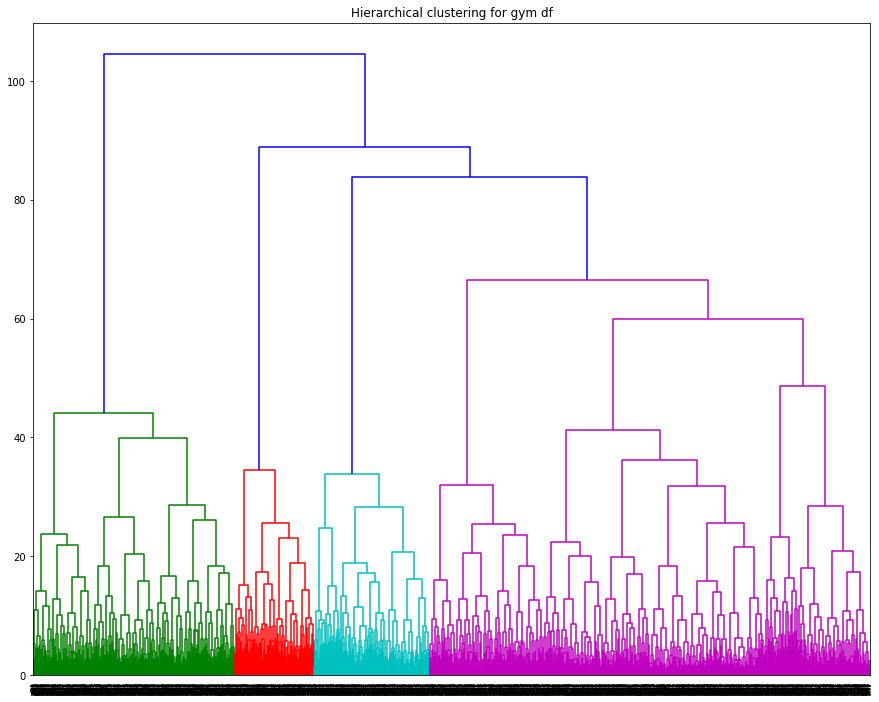

In [41]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(df_cluster)

# Use the linkage() function to build a matrix of distances based on the standardized feature matrix.
linked = linkage(x_sc, method='ward')

# plot a dendrogram
plt.figure(figsize=(15, 12))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym df')
plt.show()

#### Conclusions:
- According to the model, the best way to divide the data is into 4 different clusters (k = 4)

In [42]:
# Train the clustering model with the K-means algorithm and predict customer clusters

# define the k_means model with 3 clusters
km = KMeans(n_clusters = 5, random_state = 0)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

# add the clusters to a new column    
df_cluster['cluster_km'] = labels

<a class="anchor" id="41"></a>
###  Look at the mean feature values for clusters. Does anything catch your eye?

In [43]:
display(df_cluster.groupby('cluster_km').mean())

gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.502473       0.959446  0.783383       0.574679  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.560335       0.976105  0.356033       0.229391  0.998805   

            contract_period  group_visits        age  \
cluster_km                                             
0                 10.884273      0.543027  29.980218   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.665472      0.473118  30.127838   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km                                                                  
0                             160.706969               9.950544  4.738872   
1                             143.957664               4.475325  3.924675   
2                             135.457501               2.198020  2.809901   
3                             131.622204               1.856577  2.440571   
4                             161.724258               2.455197  4.896057   

            avg_class_frequency_total  avg_class_frequency_current_month  
cluster_km                                                                
0                            1.983305                           1.976225  
1                            1.847220                           1.716369  
2                            1.660461                           1.477324  
3                            1.247634                           1.012983  
4                            2.851531                           2.849473

##### Conclusion:
- in near location 2 clusters are classified with 0 (none live nearby) and 1 (all live nearby), this could suggest that this parameter has a very significant impact on churn rate.

<a class="anchor" id="42"></a>
### Plot distributions of features for the clusters. Do you notice anything?

<b> Student comment: Added the entire data set for the plots and added correlated data filtering </b>

In [44]:
# drop multicolinear columns
df_cluster= df_cluster.drop(['avg_class_frequency_current_month','month_to_end_contract'], axis = 1)

In [45]:
enmax_palette = ["#003f5c","#58508d","#bc5090","#ff6361","#ffa600"]

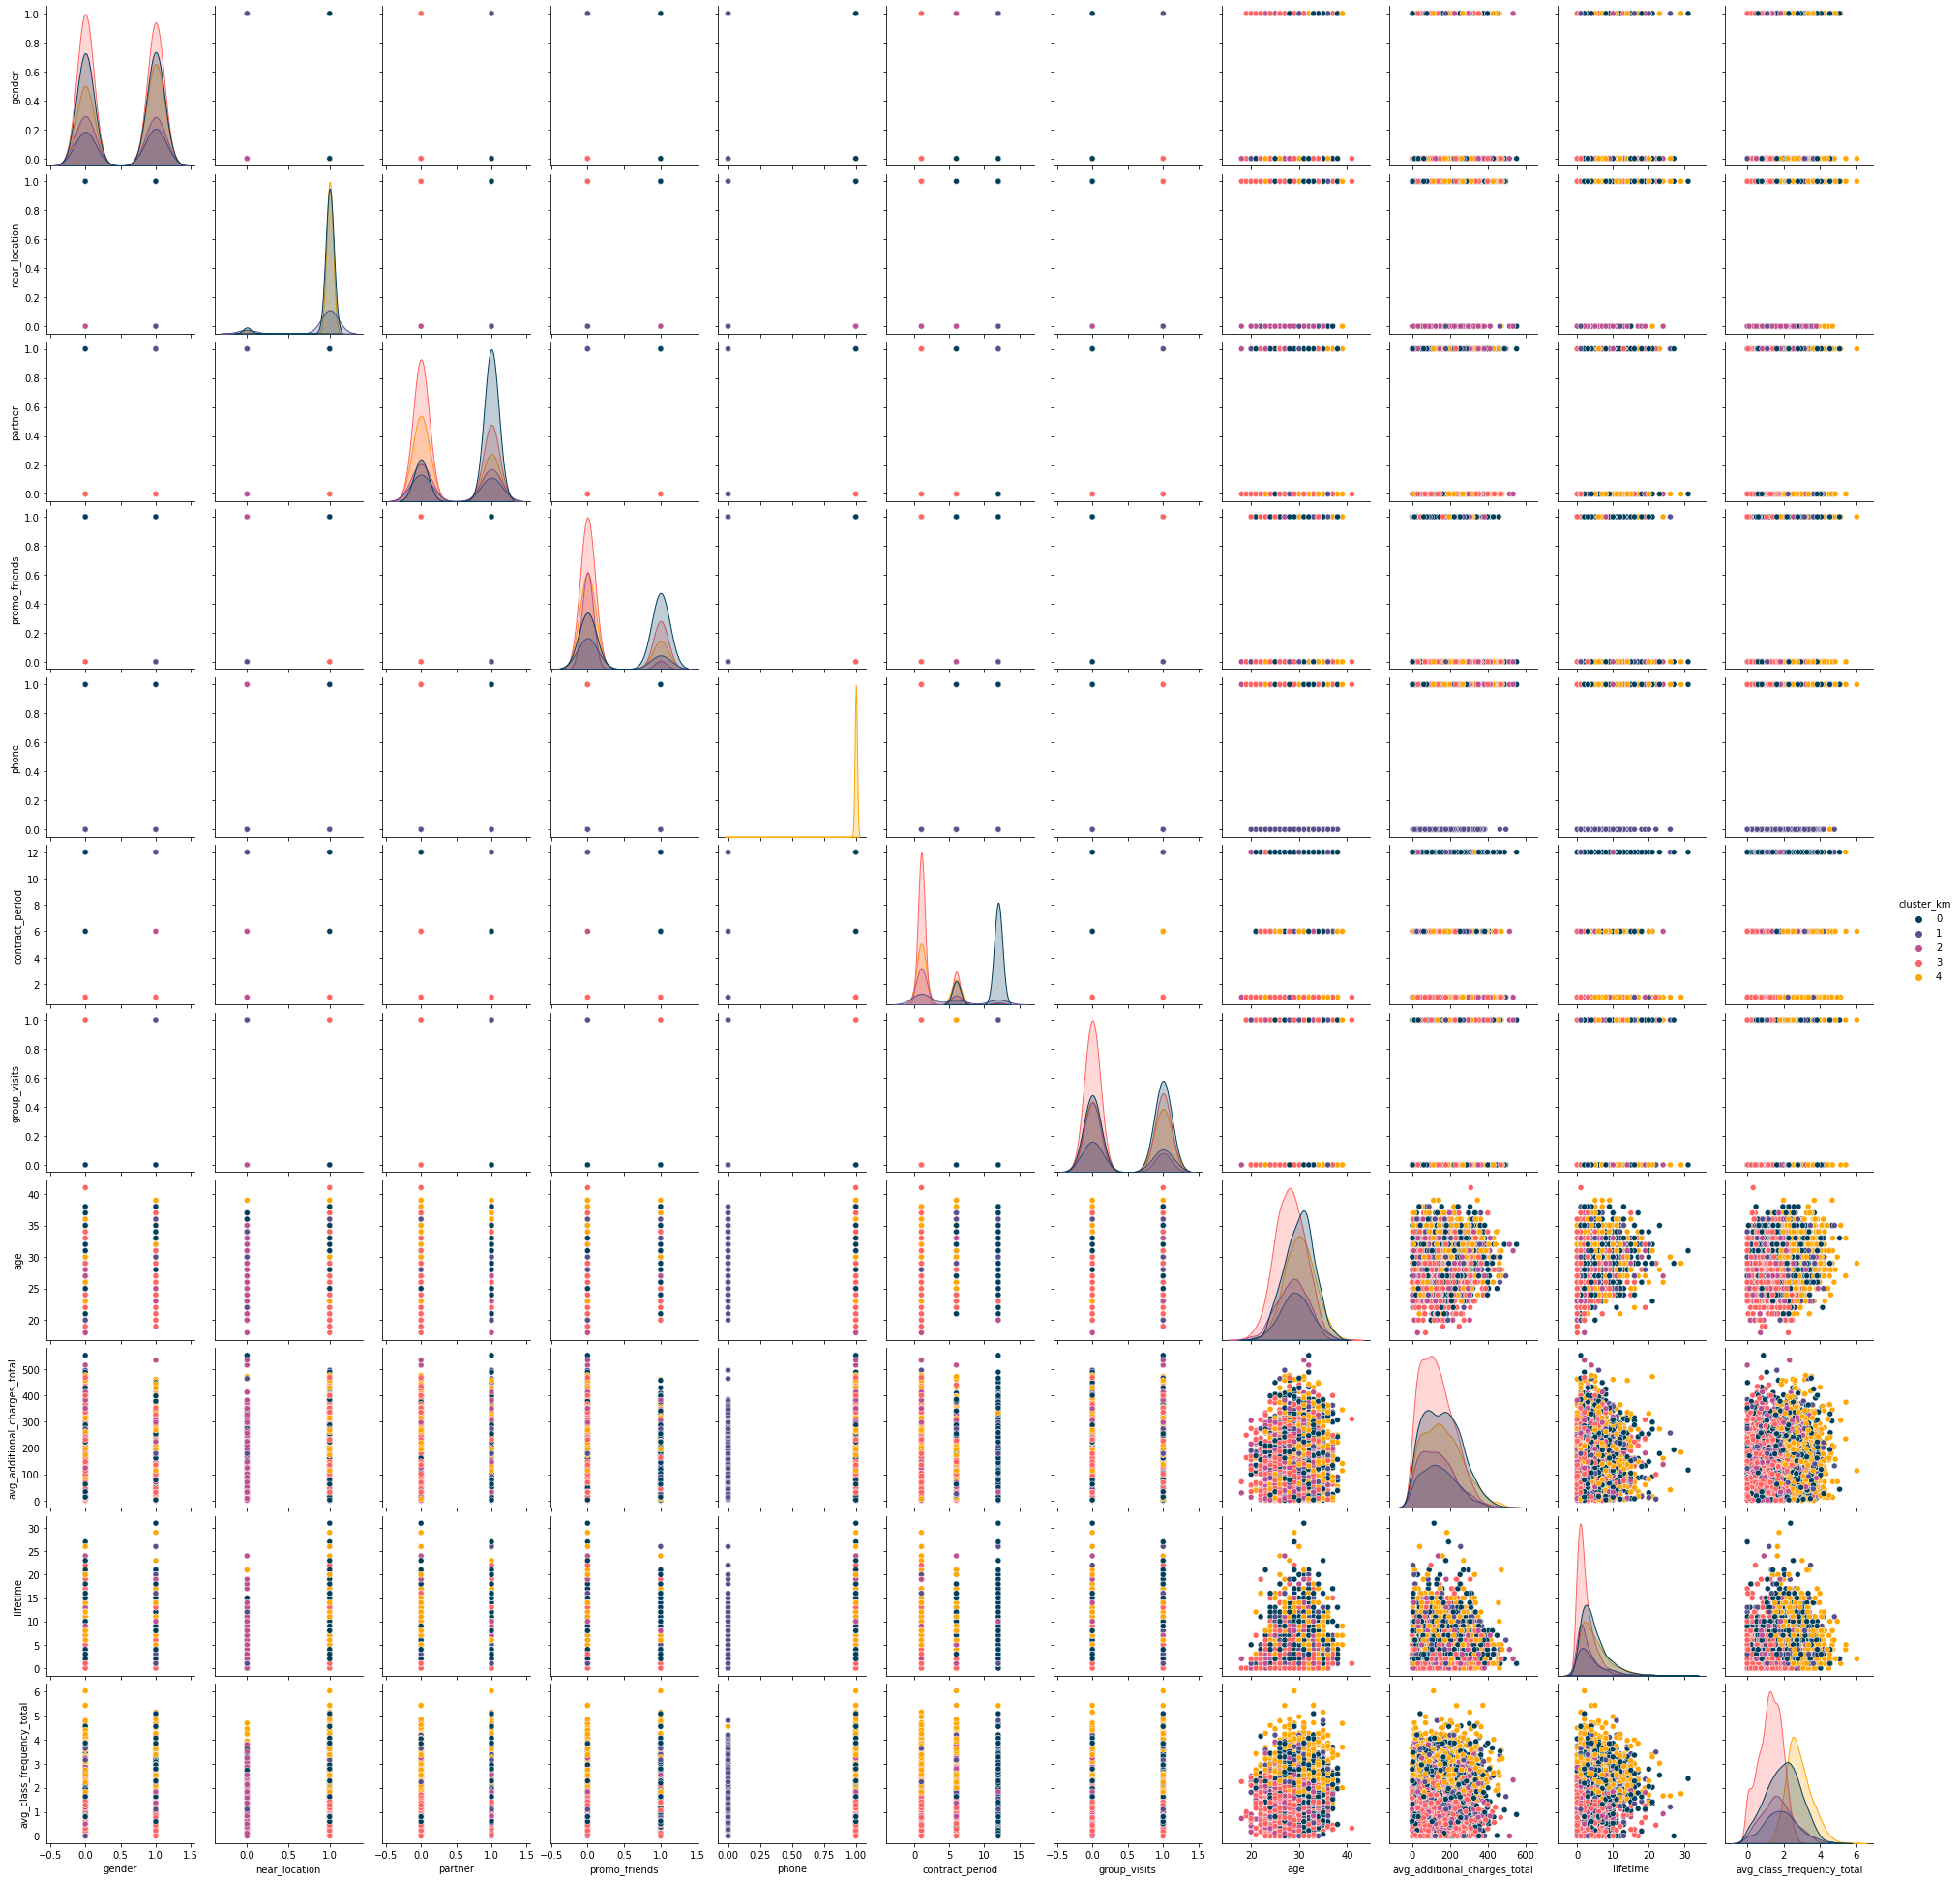

In [46]:
# run pairplot on the entire df
sns.pairplot(df_cluster, hue="cluster_km", palette=enmax_palette)

<b> Student comment: added boxplot for continious variables: </b>

The pairplot show difference between clusters, however, it is better to focus on the non_binary features features

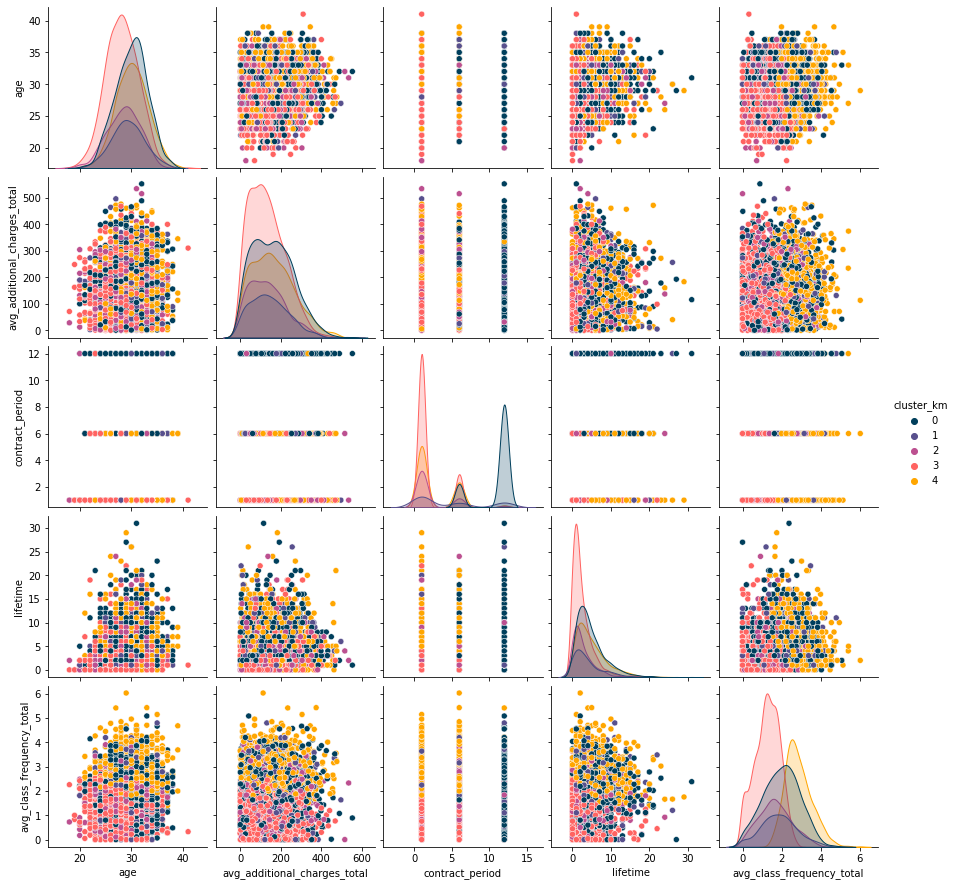

In [47]:
# creat a series with desired features for pair plot 
non_binary_cluster = non_binary + ['cluster_km']
list_to_remove = ['month_to_end_contract', 'avg_class_frequency_current_month']
non_binary_cluster =  list(set(non_binary_cluster) - set(list_to_remove))

# plot filtered features
sns.pairplot(df_cluster[non_binary_cluster], hue="cluster_km", palette=enmax_palette)



#### Conclusions:

- There are significant diffrences in clusters sizes: 1262 for the largest cluster (3) compare to 385 in the smallest cluster (1).
- We can see there are many overlapping areas in the distribution plots, especially in the contineous featuers. Despite the overlapping, we can clearly see that there are visible changes between the clusters.
- We will plot these features with boxplots for additional analysis.

#### Plotting boxplots for non_binary features

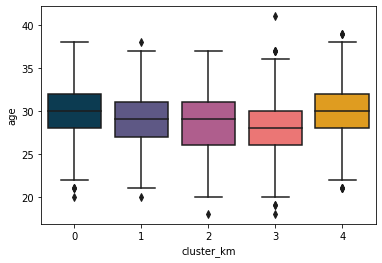

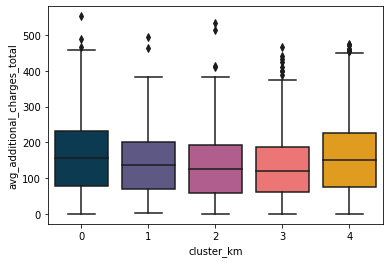

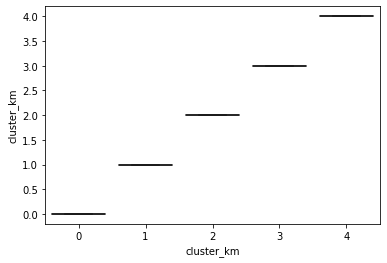

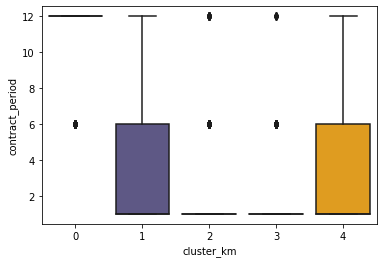

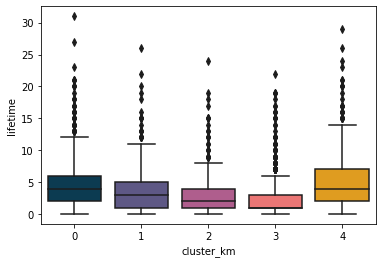

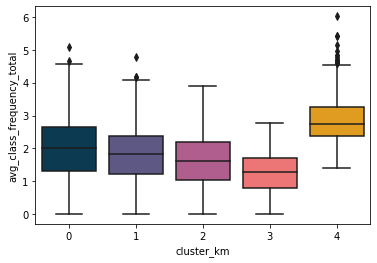

In [48]:
for i in non_binary_cluster:
    sns.boxplot(x = 'cluster_km', y = i, data = df_cluster,  palette=enmax_palette)
    plt.show()

<font color='gray'>

### student comment after V2: 
for additional cluster analysis, checking mean values

In [49]:
df_non_binary_clutser = df_cluster[non_binary_cluster]

cols = non_binary
lst = []

for i in df_non_binary_clutser.cluster_km.unique():
    temp_clus = df_non_binary_clutser[df_non_binary_clutser['cluster_km'] == i]
    #display(temp_clus)
    clus_len = len(temp_clus)
    temp_clus_group = temp_clus.groupby('cluster_km').mean()
    lst.append(temp_clus_group.iloc[0])
df1 = pd.DataFrame(lst, columns=cols)
df1

contract_period        age  avg_additional_charges_total  \
1         4.787013  29.301299                    143.957664   
0        10.884273  29.980218                    160.706969   
3         1.948494  28.167987                    131.622204   
4         2.665472  30.127838                    161.724258   
2         2.352475  28.477228                    135.457501   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
1                    NaN  3.924675                   1.847220   
0                    NaN  4.738872                   1.983305   
3                    NaN  2.440571                   1.247634   
4                    NaN  4.896057                   2.851531   
2                    NaN  2.809901                   1.660461   

   avg_class_frequency_current_month  
1                                NaN  
0                                NaN  
3                                NaN  
4                                NaN  
2                                NaN

<font color='gray'>

    
### student comment after V2: 
Check non binary distributions for all clusters

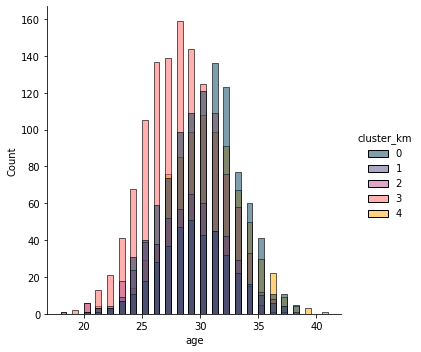

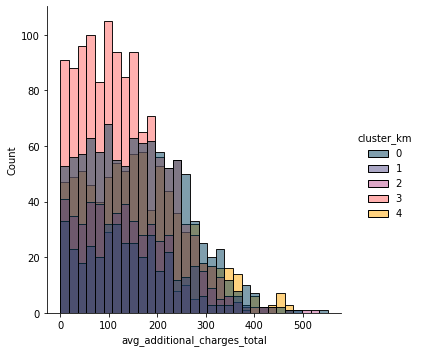

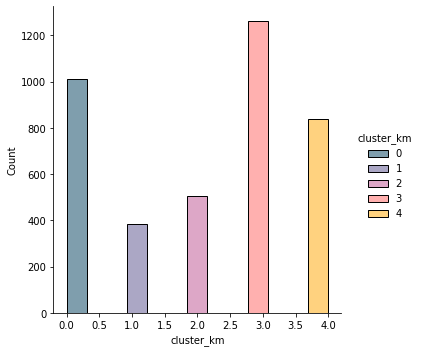

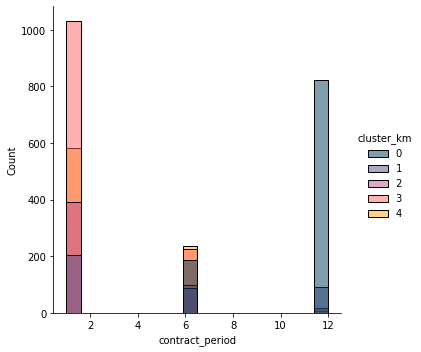

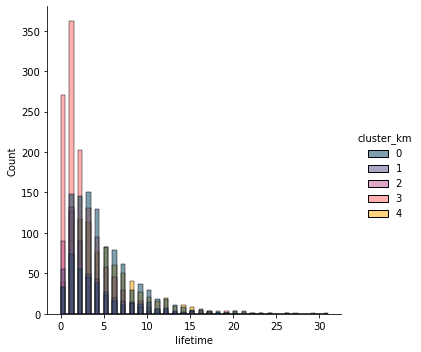

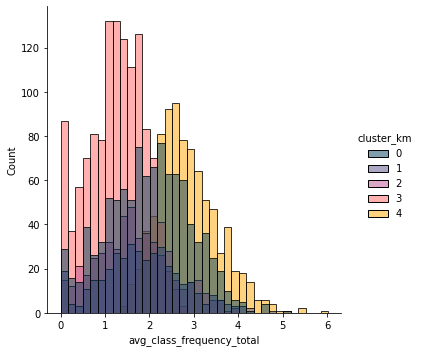

In [50]:
# aftrer v2# 
df_cluster[non_binary_cluster]

for i in non_binary_cluster:
        sns.displot(df_cluster[non_binary_cluster], x=i, hue="cluster_km", palette=enmax_palette)

<font color='gray'>

### student comment after V2: 

#### Clusters difference for continous values:
- Cluster 0: 12 month contract period,
- Cluster 1: mostly 6 month contract period, 
- Cluster 2: average of 2.5 month contract period
- Cluster 3: 1 month contract period,
- Cluster 4: average of 2.5 month contract period
    
all other continous paramters not showing significant difference, that is mostly noteable viewing the average values table

<font color='gray'>

### student comment after V2: 
check the distribuion of binary data using boxplots

In [51]:
binary_cluster = binary + ['cluster_km']
list_to_remove = ['churn']
binary_cluster =  list(set(binary_cluster) - set(list_to_remove))

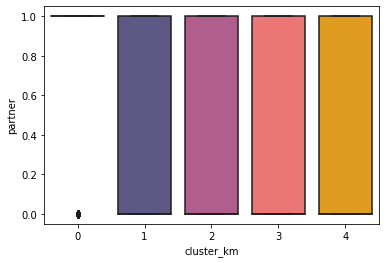

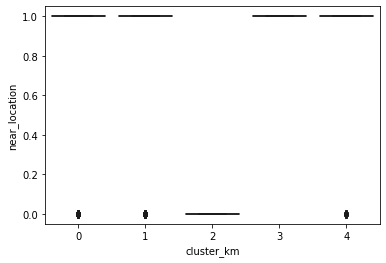

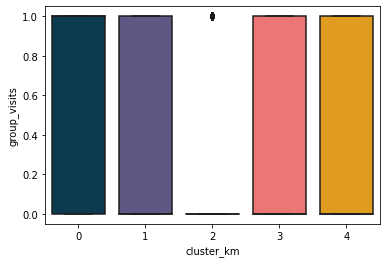

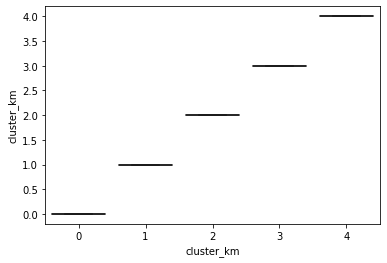

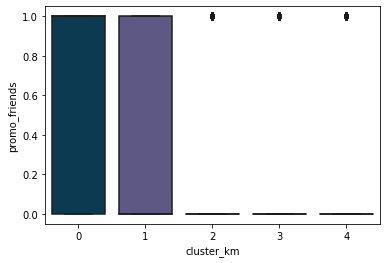

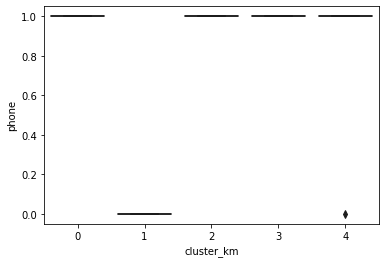

In [52]:
# aftrer v2# 
for i in binary_cluster:
    sns.boxplot(x = 'cluster_km', y = i, data = df_cluster, palette=enmax_palette)
    plt.show()

<font color='gray'>

### student comment after V2: 
Check the relative amount of '1' values for each cluster

In [53]:

df_binary_clutser = df_cluster[binary_cluster]

cols = ['promo_friends', 'near_location' ,'phone', 'partner','group_visits','gender'] 
lst = []

for i in df_binary_clutser.cluster_km.unique():
    temp_clus = df_binary_clutser[df_binary_clutser['cluster_km'] == i]
    clus_len = len(temp_clus)
    temp_clus_group = temp_clus.groupby('cluster_km').sum() / clus_len
    lst.append(temp_clus_group.iloc[0])
df1 = pd.DataFrame(lst, columns=cols)
df1

promo_friends  near_location     phone   partner  group_visits  gender
1       0.306494       0.862338  0.000000  0.470130      0.425974     NaN
0       0.574679       0.959446  1.000000  0.783383      0.543027     NaN
3       0.240095       1.000000  1.000000  0.350238      0.341521     NaN
4       0.229391       0.976105  0.998805  0.356033      0.473118     NaN
2       0.079208       0.000000  1.000000  0.463366      0.215842     NaN

In [54]:
# QA for the upper df, just to make sure I didn't calculate anything wrong
for i in df_cluster['cluster_km'].unique():
    df_temp = df_cluster[df_cluster['cluster_km'] == i][binary_cluster]
    display('cluster {}'.format(i))
    for j in df_temp:
        display(df_temp[j].value_counts())
        display('{}, "1" value accounts for {:.2%}'.format(j, (len(df_temp[df_temp[j] == 1]) / len(df_temp))))


'cluster 1'

0    204
1    181
Name: partner, dtype: int64

'partner, "1" value accounts for 47.01%'

1    332
0     53
Name: near_location, dtype: int64

'near_location, "1" value accounts for 86.23%'

0    221
1    164
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 42.60%'

1    385
Name: cluster_km, dtype: int64

'cluster_km, "1" value accounts for 100.00%'

0    267
1    118
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 30.65%'

0    385
Name: phone, dtype: int64

'phone, "1" value accounts for 0.00%'

'cluster 0'

1    792
0    219
Name: partner, dtype: int64

'partner, "1" value accounts for 78.34%'

1    970
0     41
Name: near_location, dtype: int64

'near_location, "1" value accounts for 95.94%'

1    549
0    462
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 54.30%'

0    1011
Name: cluster_km, dtype: int64

'cluster_km, "1" value accounts for 0.00%'

1    581
0    430
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 57.47%'

1    1011
Name: phone, dtype: int64

'phone, "1" value accounts for 100.00%'

'cluster 3'

0    820
1    442
Name: partner, dtype: int64

'partner, "1" value accounts for 35.02%'

1    1262
Name: near_location, dtype: int64

'near_location, "1" value accounts for 100.00%'

0    831
1    431
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 34.15%'

3    1262
Name: cluster_km, dtype: int64

'cluster_km, "1" value accounts for 0.00%'

0    959
1    303
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 24.01%'

1    1262
Name: phone, dtype: int64

'phone, "1" value accounts for 100.00%'

'cluster 4'

0    539
1    298
Name: partner, dtype: int64

'partner, "1" value accounts for 35.60%'

1    817
0     20
Name: near_location, dtype: int64

'near_location, "1" value accounts for 97.61%'

0    441
1    396
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 47.31%'

4    837
Name: cluster_km, dtype: int64

'cluster_km, "1" value accounts for 0.00%'

0    645
1    192
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 22.94%'

1    836
0      1
Name: phone, dtype: int64

'phone, "1" value accounts for 99.88%'

'cluster 2'

0    271
1    234
Name: partner, dtype: int64

'partner, "1" value accounts for 46.34%'

0    505
Name: near_location, dtype: int64

'near_location, "1" value accounts for 0.00%'

0    396
1    109
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 21.58%'

2    505
Name: cluster_km, dtype: int64

'cluster_km, "1" value accounts for 0.00%'

0    465
1     40
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 7.92%'

1    505
Name: phone, dtype: int64

'phone, "1" value accounts for 100.00%'

<b> Student comment: Clusters description: </b>

- The main difference between the clusters in the continious variables is the contract length: c0 with 12 months, c2 & c3 with 0 months, and c1 & c4 with 6 months.
- The rest of the continious variables show simialr boxplots distributions.

<font color='gray'>
    
### Conclusions and clusters sepration after V2

<font color='gray'>

#### Clusters difference for binay values:
- Cluster 0: 54% group visits, 96% near location, 57% promo friends, 54% group visits, 78% partner, 100% phone.
- Cluster 1: 42% group visits, 86% near location, 30% promo friends, 42% group visits, 47% partner ,0% phone.
- Cluster 2: 0 group visits, 0 near location, 0 promo_friends, 21% group visits, 46% partner, 100% phone.
- Cluster 3: 34% group visits, 100% near location, 24% promo friends, 34% group visits, 35% partner, 100% phone
- Cluster 4: 47% group visits, 97% near location, 23% promo friends,  47% group visits, 35% partner, 100% phone
   

##### Conclusion:
- many of the paired features show no correlation, therefore it was filtered to the observed plot.
- The strongest relations which can be relevant for analysis were observed at age vs. class frequency 

In [55]:
# Function to oom in some of the pair plots: 

def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


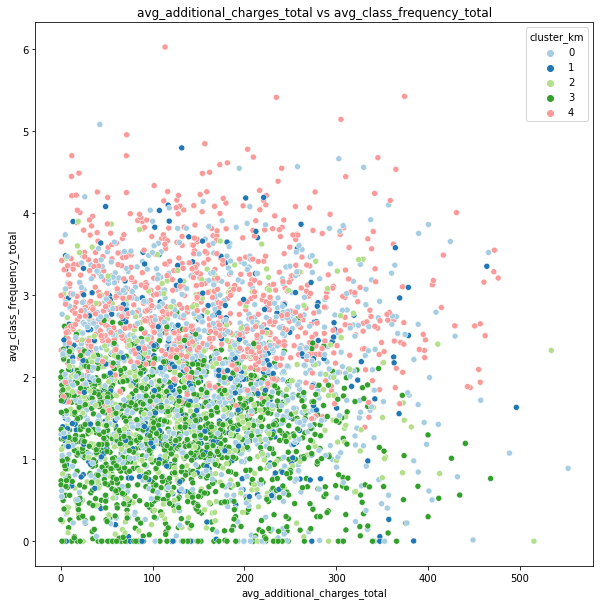

In [56]:
# avg_additional_charges_total & avg_class_frequency_current_month 
show_clusters_on_plot(df_cluster[non_binary_cluster], 'avg_additional_charges_total', 'avg_class_frequency_total', 'cluster_km')

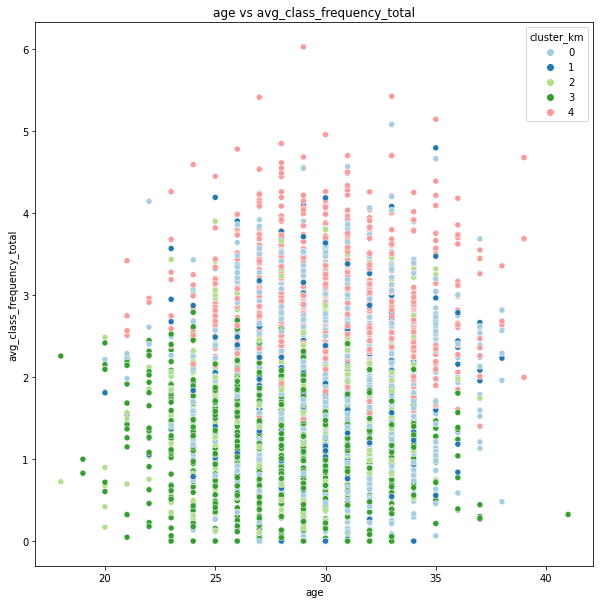

In [57]:
# age & avg_class_frequency_current_month
show_clusters_on_plot(df_cluster[non_binary_cluster], 'age', 'avg_class_frequency_total', 'cluster_km')

#### Conclusion:
- a reasnoble serpertion was viewed only in 'avg_additional_charges_total' - 'avg_class_frequency_total'  and 'age' - 'avg_class_frequency_total' paird features

<a class="anchor" id="43"></a>
### - Calculate the churn rate for each cluster 

In [58]:
# add cluster columns to the original df
df['cluster_km'] = labels

# create new df by groupby cluster, count total customers for each cluster
cluster_churn_rate = df.groupby('cluster_km')['churn'].count().reset_index()

# rename columns
cluster_churn_rate = cluster_churn_rate.rename(columns = {'churn': 'total_customers'})

# calculate the number of churn customers 
cluster_churn_sum = df.groupby('cluster_km')['churn'].sum().reset_index()

# add number of churn customers to df
cluster_churn_rate['churn'] = cluster_churn_sum['churn']

# calculate churn rates
cluster_churn_rate['churn_percent'] = cluster_churn_rate['churn'] / cluster_churn_rate['total_customers']

# display churn rates 
cluster_churn_rate

cluster_km  total_customers  churn  churn_percent
0           0             1011     28       0.027695
1           1              385    103       0.267532
2           2              505    224       0.443564
3           3             1262    649       0.514263
4           4              837     57       0.068100

<font color='gray'>
    
### Conclusions and clusters sepration after V2

#### Churn rates:
- Low churn rate: Cluster 0 and Clutser 4:
- High churn rate: Clusters 2 and 3.
- Medium churn rate: cluster 1 

#### Clusters difference for binay values:
- Cluster 0: 54% group visits, 96% near location, 57% promo friends, 54% group visits, 100% phone.
- Cluster 1: 42% group visits, 86% near location, 30% promo friends, 42% group visits, 0% phone.
- Cluster 2: 0 group visits, 0 near location, 0 promo_friends, 21% group visits, 46% partner, 100% phone.
- Cluster 3: 34% group visits, 100% near location, 24% promo friends, 34% group visits, 35% partner, 100% phone
- Cluster 4: 47% group visits, 97% near location, 23% promo friends,  47% group visits, 35% partner, 100% phone
    
#### Clusters difference for continous values:
- Cluster 0: 12 month contract period,
- Cluster 1: mostly 6 month contract period, 
- Cluster 2: average of 2.5 month contract period
- Cluster 3: 1 month contract period,
- Cluster 4: average of 2.5 month contract period
all other continous paramters not showing significant difference, that is mostly noteable viewing the average values table
    

    
## Conclusions after v2:
    
- Loyal customers (0,4) are charcterized by 50% group sessions participation (group visits), mostly live nearby, medium use promo friends. 
- Churn customers (2,3) are charcterized by short contract periods, low group sessions participation (group visits), low promo friends and low group visits.
  
- Medium churn customers (1) are charterized by a mix of these values, no extream values except for phone information.
    
 

#### conclusions:
- we can see that there are very strong diffrences in churn rate.
- in any case, churn rate will is cetrain to be 50% or less. The model didn't find any particular group which is characterized by very high chances for leaving the gym

# Step 5 - Overall Conclusion

<b> EDA Analysis </b>
- near location seems to play a role in keeping users membership. We can increase or suggest special offers for people live far from the gym in order to increase their stay rate.


<b> Supervised Models </b>
- Logistic Regression showed slightly better results compared to the random forest model.
- Both models show high values for Accuracy, Percision and Recall. 


<b> Unsupervised Models </b>
- Using the dendogram, the model divided to users into 4 clusers.
- Using the K-Means method with k=5, a reasnoble serpertion was viewed only in 'avg_additional_charges_total' and 'avg_class_frequency_current_month' pair features, resulting with the observation that people who spend more money on additional goods also participate more in classes. This is reasonable as these customers probably visit at the gym at higher frequency compare to those who spend less.
- using the K-means method with k=5, the model seperates users by churn rates where some of the customers have more then 50% chance of leaving the gym. while others only 2.6%.
- The most dominant features for cluster sepeartion: contract period

<b> students comment </b>

- It seems that the best way to improve churn rate, is by focusing on customers who do not live nearyby. 

Struggeling to find good marketing steps, as the clusters don't present what is the expected churn rate for each cluster.


<font color='gray'>
    
## Conclusions after v2:
    
- Loyal customers (0,4) are charcterized by 50% group sessions participation (group visits), live nearby, medium use promo friends. 
- Churn customers (2,3) are charcterized by short contract periods, low group sessions participation (group visits), low promo friends and low group visits.
- Using the clusters information, we have conclude that high churn customers are charcterized by short contract periods, low participation in classes and low registration through a 'friend bring a friend' coupon. 
    
    
Suggestions:
- we need to put more emphasis on short contract users, especially those who are not registered thorugh a friend or a company.
- Try to give special offer for short 1 month contracts, for example, 2nd month with 50% discount.
- For those who are not registraed by a friend or a company, and for short contracts, we should suggest speical offers for particapting in groups activity.
- Cluster 2 is the represntative for people who live far away. These people have high churn rates, and therfore, we should suggest additional offers for these customers, for example, an option to participate in free classes, or additional entry options for our gyms located in more regions, if we are a chain.
 

<b> Student comment </b>

- I had trouble really gaining insights from the clustering, I would suggest to change it to n=3 rather then 5. 
- Not sure about the clustering process, we divide the data into 5 clusters, but in the bottom line, after all sepeation is done, there is no data about the churn rate for each cluster, did I missed a step?
- Also, we had a thread in the slac regarding Logistic Regression, for what I understoond from reading, is it condisered as a classifier, while most say it's a regression model ( I know it has regression z function inside the function). Problem is that from what I know we use it mostly to classify (for example, are mice fat or not? rather then 'the price of a house') Would glad to hear you opinion.

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>

- You calculated churn rates in cell 50. If you want them to be calculated for you, you should append labels to your initial dataset df and re-run cell 40. 
    
- Logistic regression predicts probabilities. In our case, it predicts the probability of being a churner. For example, if the predicted probability is higher than 50%, we classify the observations as class 1. We can change this threshold depending on our needs.
    
    So, Logistic regression predicts values only in range [0,1], while Linear regression (I guess this is the second option discussed in the chat) can result in any values. Thus, if we want to predict prices, we use Linear regression. If we want to predict probabilities, we use Logistic regression. We could possibly try Linear regression, but we can get the probability of 1.7 which is impossible. 